In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [57]:
df = pd.read_csv("ai_dev_productivity.csv")
df

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
...,...,...,...,...,...,...,...,...,...
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0


In [58]:
df.columns.unique()

Index(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load',
       'task_success'],
      dtype='object')

In [59]:
x = df[['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load']]

scalar = StandardScaler()

scalar_x = scalar.fit_transform(x)

pca = PCA(n_components=2,random_state=42)

pca_x  = pca.fit_transform(scalar_x)

model = KMeans(n_clusters=2,random_state=42)

model.fit(pca_x)

y_pred = model.labels_

print(y_pred)

[0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1
 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1
 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0
 1 1 0 1 1 1 1 0 0 0 0 0 

In [60]:
import numpy as np

new_sample = np.array([[6.2, 520, 2, 7.1, 4, 1, 1.35, 5.8]])
new_scaled = scalar.transform(new_sample)
new_pca = pca.transform(new_scaled)


cluster = model.predict(new_pca)
print(cluster)



[0]


e:\machine learnig\ml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


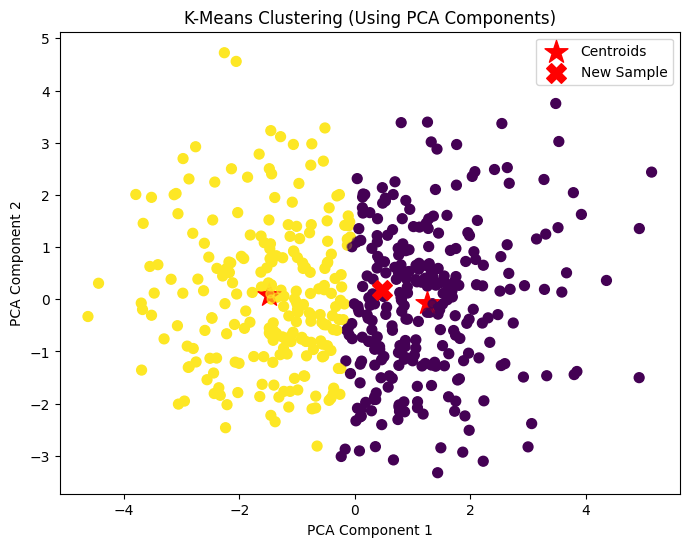

In [62]:

plt.figure(figsize=(8, 6))

# Scatter plot of PCA components
plt.scatter(
    pca_x[:, 0], 
    pca_x[:, 1], 
    c=y_pred, 
    s=50, 
    cmap='viridis'
)

centroids = model.cluster_centers_
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1],
    marker='*',
    s=300,
    c='red',
    label='Centroids'
)

plt.scatter(pca_x[:,0], pca_x[:,1], c=y_pred, alpha=0.6)
plt.scatter(new_pca[0,0], new_pca[0,1], 
            color='red', marker='X', s=200, label='New Sample')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (Using PCA Components)")
plt.legend()
plt.show()